XGBoost (Extreme Gradient Boosting)

그래디언트 부스팅의 일종으로, 예측 성능이 뛰어나고 여러 경진 대회에서 자주 사용됩니다.
    
XGBoost는 모델 학습과 예측에서 빠르고 효율적인 성능을 자랑하며, 정확도가 매우 우수한 분류 및 회귀 모델입니다.

여기서는 XGBoost를 사용하여 붓꽃(Iris) 데이터셋을 예측하는 파이썬 코드 예시를 제공하겠습니다. 

이 예시에서는 XGBoost 모델을 학습하고, 혼동 행렬과 특성 중요도를 시각화하는 방법도 추가

In [ ]:
# 코드 설명:
# XGBoost 모델 생성:
# xgb.XGBClassifier는 분류 문제를 해결하기 위한 XGBoost 모델입니다. 하이퍼파라미터로 n_estimators=100 (트리의 개수)을 설정하였습니다.
# 모델 학습:
# fit() 함수를 사용하여 학습 데이터를 모델에 학습시킵니다.
# 예측:
# predict() 함수를 사용하여 테스트 데이터에 대한 예측을 수행합니다.
# 정확도 평가:
# accuracy_score(y_test, xgb_y_pred)를 사용하여 정확도를 평가합니다.
# 혼동 행렬 (Confusion Matrix):
# 혼동 행렬을 계산하고 seaborn의 heatmap을 사용하여 시각화합니다. 혼동 행렬은 예측된 값과 실제 값 간의 관계를 보여주는 유용한 도구입니다.
# 특성 중요도 (Feature Importance):
# feature_importances_를 사용하여 각 특성이 예측에 얼마나 중요한지 평가하고, 수평 바 차트로 시각화합니다.

XGBoost 모델 정확도: 100.00%


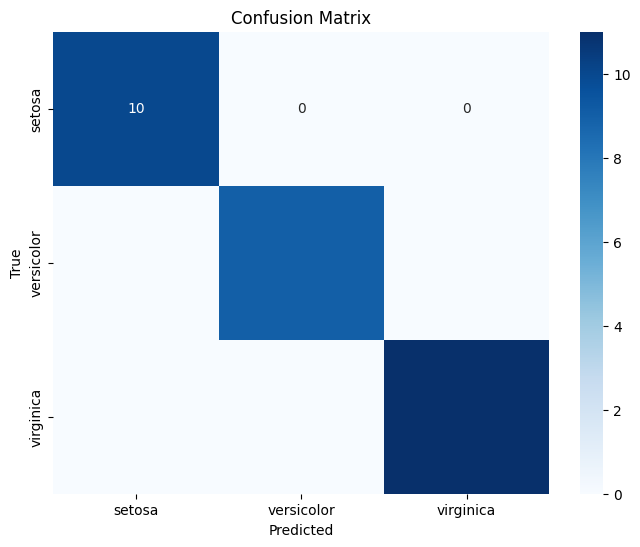

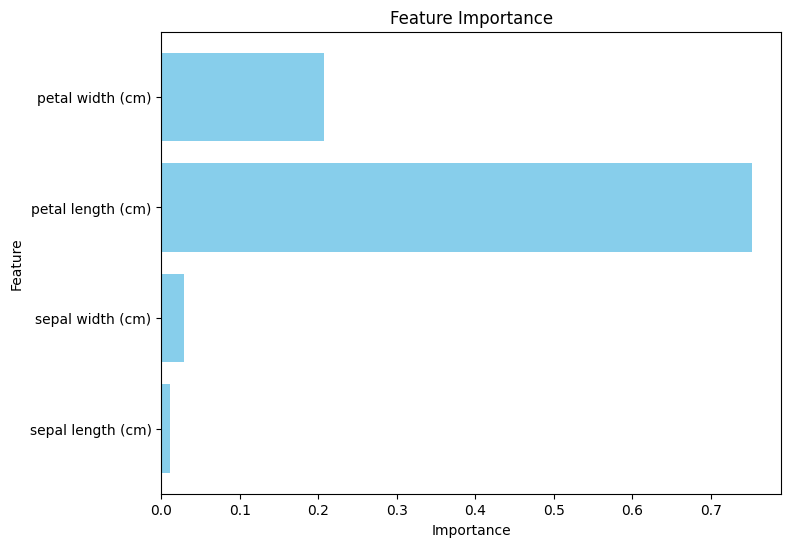

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.datasets import load_iris

# 예시 데이터셋: 붓꽃(Iris) 데이터셋
iris = load_iris()
X = iris.data  # 특성 (Features)
y = iris.target  # 레이블 (Labels)

# 훈련용 데이터와 테스트용 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 테스트 데이터로 예측
xgb_y_pred = xgb_model.predict(X_test)

# 정확도 평가
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost 모델 정확도: {xgb_accuracy * 100:.2f}%")

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 특성 중요도 시각화
feature_importances = xgb_model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# 출력:
# 정확도: XGBoost 모델의 예측 정확도를 출력합니다.
# 혼동 행렬: 예측된 값과 실제 값 간의 관계를 나타내는 혼동 행렬을 시각화합니다.
# 특성 중요도: 각 특성의 중요도를 나타내는 수평 바 차트를 시각화합니다.